In [59]:
from pathlib import Path
import numpy as np
from ase.io import read as aseread
import matplotlib.pyplot as plt
from icecream import ic

%matplotlib inline

In [30]:
xyz_path = Path('data/AZ/cs-inversion/AZ_cs-DFT_inversion_path.xyz')

In [31]:
atoms_list = aseread(xyz_path, index=":")

In [32]:
len(atoms_list)

179

In [55]:
# get omega angle for plotting
omega = np.array([x.get_dihedral(0, 11, 12, 13)  for x in atoms_list])

deg = 180.0 / np.pi
omega[omega > np.degrees(np.pi)] -= np.degrees(2 * np.pi )
omega = -omega

In [34]:
npy_path = Path('data/AZ/cs-inversion/npy')
prefix = 'cs_iso'

In [35]:
npy_dict = {
    'amber': npy_path / f'{prefix}_E_amber_kcal_mol.npy',
    'QM': npy_path / f'{prefix}_E_QM_kcal_mol.npy',
    'torchani': npy_path / f'{prefix}_E_torchani_kcal_mol.npy',
    'hippynn': npy_path / f'{prefix}_E_hippynn_kcal_mol.npy',
    'sage': npy_path / f'{prefix}_E_sage_kcal_mol.npy'
}

In [70]:
# load all energies
E_hippynn = np.load(npy_dict['hippynn'], allow_pickle=True)
E_QM = np.load(npy_dict['QM'], allow_pickle=True)
E_torchani = np.load(npy_dict['torchani'], allow_pickle=True)
E_sage = np.load(npy_dict['sage'], allow_pickle=True)
E_amber = np.load(npy_dict['amber'], allow_pickle=True)

In [ ]:
print(max(E_sage), max(E_amber)) # barrier in FFs

87.58020374618562 182.59488371583473


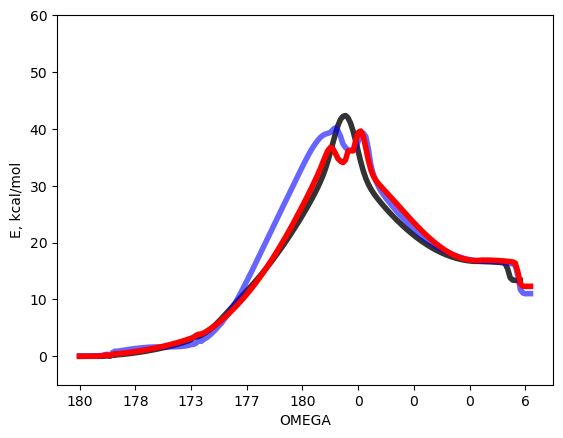

In [74]:
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('%.0f')

fig, ax1 = plt.subplots()
ax1.set_ylabel('E, kcal/mol')
ax1.set_xlabel('OMEGA')
ax1.set_ylim(-5, 60)

# ax1.plot(E_amber, label = 'amber', linewidth = 4, alpha = 0.6, linestyle = 'dashed', color = 'grey')
# ax1.plot(E_sage, label = 'sage', linewidth = 4, alpha = 0.6, linestyle = 'dashed', color = 'orange')
ax1.plot(omega.astype('str'), E_QM, label = 'DFT closed-shell', color = 'black', linewidth = 4, alpha = 0.8)
ax1.plot(E_torchani, label = 'torchani', color = 'blue', linestyle = 'solid', linewidth = 4, alpha = 0.6)
ax1.plot(E_hippynn, label = 'hippynn', color = 'red', linewidth = 4)

tick_positions = np.arange(0, len(omega), 22)
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(f'{x:.0f}' for x in omega[tick_positions])
plt.savefig('azo_rotational_profile_closed-shell_final-all.png', dpi=300)
plt.show()
